# Google Stock Price Prediction System

## Project Overview

This project aims to develop a robust, accurate, and innovative system for predicting Google stock prices using historical stock market data. The goal is to provide actionable insights for investors, analysts, and traders while adhering to industry best practices and regulatory standards.

---

## Methodology and Workflow

The project follows a structured, step-by-step approach:

1. **Problem Definition**  
   - Objective: Predict future Google stock prices (Close price) using historical data.
   - Business Value: Enables informed investment decisions, portfolio optimization, and risk reduction.
   - Challenges: Stock prices are noisy, non-stationary, and affected by multiple external factors.

2. **Data Collection and Loading**  
   - Load the `GoogleStockPrices` dataset containing `Date`, `Open`, `High`, `Low`, `Close`, and `Volume`.
   - Ensure proper datetime parsing and sorting for time series analysis.

3. **Exploratory Data Analysis (EDA)**  
   - Visualize stock price trends and volume over time.
   - Compute summary statistics and examine correlations.
   - Detect anomalies, trends, and volatility patterns.

4. **Data Preprocessing**  
   - Handle missing values and duplicates.
   - Engineer new features: technical indicators (SMA, EMA, RSI, MACD), lag features, daily returns, and volatility.
   - Normalize features using scaling methods appropriate for time series models.

5. **Train-Test Split**  
   - Split the dataset based on time (e.g., 80% training, 20% testing) to preserve temporal order.

6. **Model Selection**  
   - Baseline models: ARIMA, Linear Regression.
   - Advanced models: LSTM, GRU, and Transformer-based models for capturing complex temporal dependencies.

7. **Model Training**  
   - Prepare sequences for time series prediction.
   - Configure model training with appropriate loss functions, optimizers, and regularization techniques.
   - Implement early stopping to avoid overfitting.

8. **Model Evaluation**  
   - Metrics: MSE, RMSE, MAE, and directional accuracy.
   - Visualize predicted vs. actual stock prices and analyze residuals.

9. **Explainability and Transparency**  
   - Use SHAP or LIME to understand feature importance.
   - Ensure predictions are interpretable for stakeholders and compliant with regulations.

10. **Deployment**  
    - Save trained models, scalers, and preprocessing pipelines.
    - Deploy as an interactive application (Streamlit or Flask).
    - Automate updates and retraining with new data.

11. **Innovation and Real-World Application**  
    - Hybrid approach combining technical indicators, deep learning models, and market sentiment analysis.
    - Provides improved predictive accuracy and actionable investment insights.

12. **Documentation and Compliance**  
    - Maintain detailed logs of data sources, preprocessing steps, model versions, hyperparameters, and validation results.
    - Ensure reproducibility and transparency for auditing purposes.

---

By following this workflow, we aim to create a fully functional, transparent, and innovative stock price prediction system that serves as a benchmark for industry applications.


In [1]:
# -------------------------------
# Import Required Libraries
# -------------------------------

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time series and technical indicators
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

# Data preprocessing and scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Machine learning / deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Visualization settings
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14,6)

print("All libraries imported successfully!")


All libraries imported successfully!


In [2]:
# -------------------------------
# Load and Inspect Dataset
# -------------------------------

# Load Google Stock Prices dataset
df = pd.read_csv("GoogleStockPrices (1).csv", parse_dates=['Date'], index_col='Date')

# Sort by Date just in case
df = df.sort_index()

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display dataset info
print("\nDataset Information:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


First 5 rows of the dataset:


,Open,High,Low,Close,Volume
Date,,,,,
01/02/2016 16:00,38.56,38.88,38.07,38.54,5576089
01/02/2017 16:00,41.20,41.20,40.61,40.76,2251047
01/02/2018 16:00,58.80,59.37,58.47,59.08,3675709
01/02/2019 16:00,56.11,56.72,55.71,55.93,1655813
01/02/2021 16:00,92.23,95.78,92.23,94.65,2012603



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 01/02/2016 16:00 to 31/12/2024 16:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9+ KB

Summary Statistics:


,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,82.678052,83.560413,81.831208,82.714996,8.797572e+06
std,43.716508,44.214494,43.257158,43.735891,1.365305e+07
min,24.960000,25.010000,24.550000,24.850000,4.656380e+05
25%,47.367500,47.637500,47.000000,47.380000,1.398751e+06
50%,64.530000,65.045000,63.935000,64.710000,1.876044e+06
75%,119.665000,121.042500,118.592500,119.700000,6.056782e+06
max,197.250000,201.420000,194.980000,196.660000,1.194550e+08



Missing Values in Each Column:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


## Exploratory Data Analysis (EDA)

In this step, we will explore the historical stock price data to understand trends, patterns, and volatility. This includes:

1. Visualizing stock price trends over time (Open, High, Low, Close).
2. Analyzing trading volume trends.
3. Checking correlations between features.
4. Identifying volatility, spikes, and any anomalies.
5. Observing seasonal or long-term trends in stock prices.


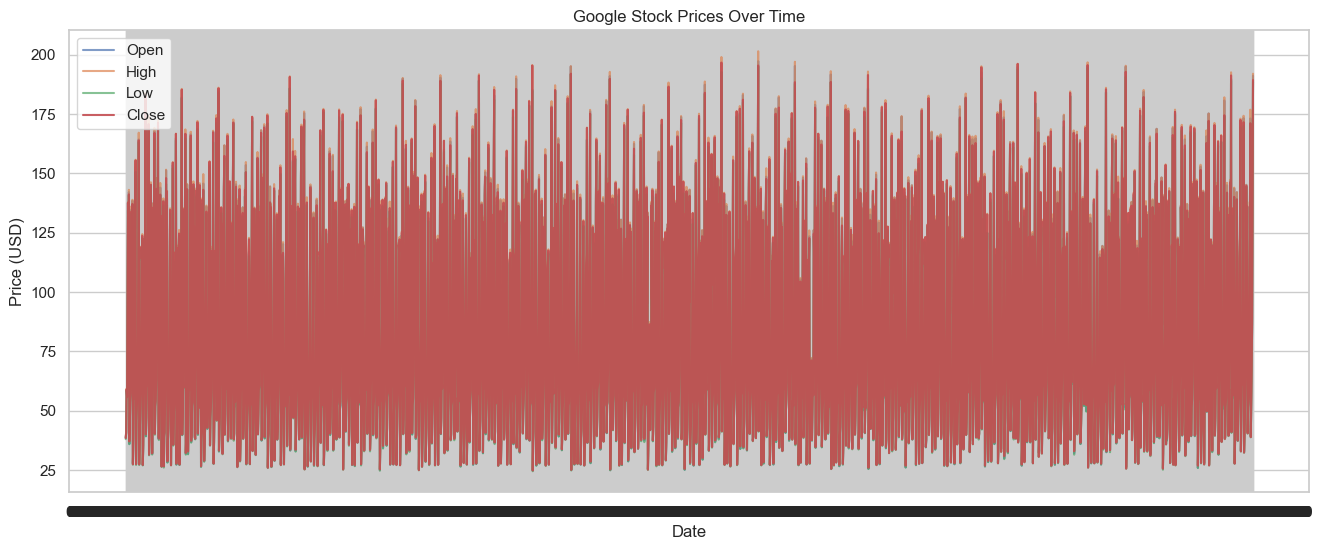

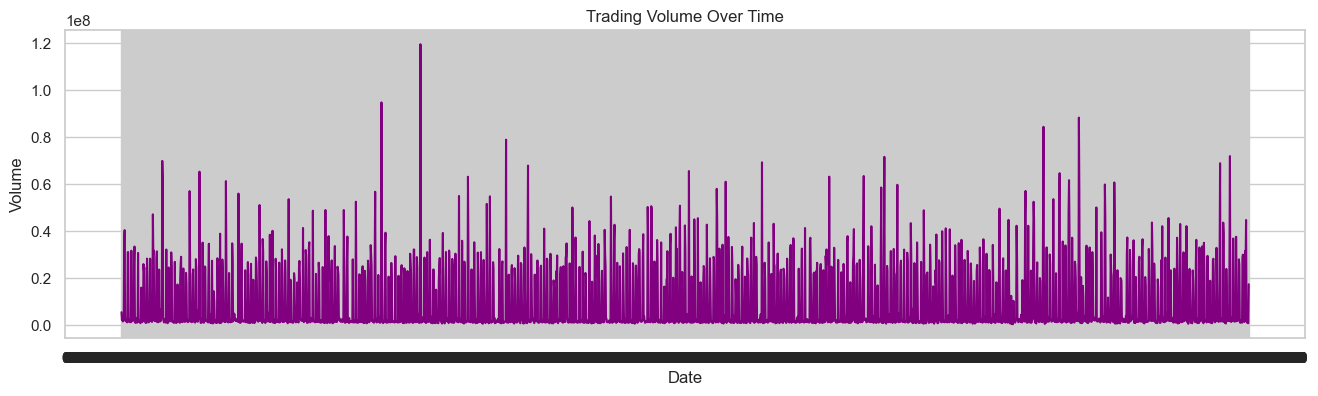

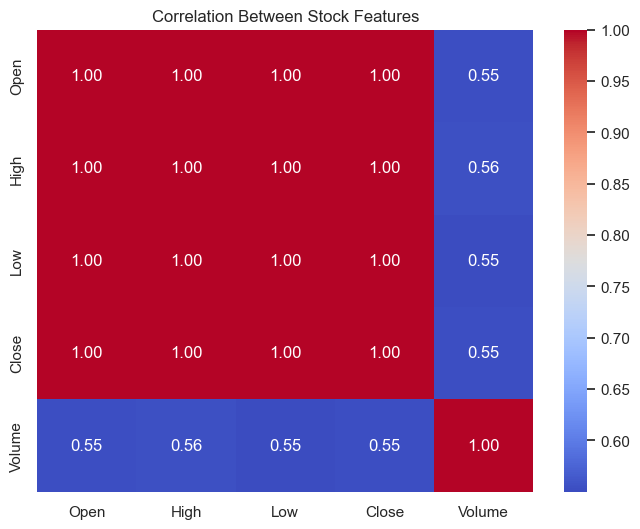

In [3]:
# -------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------

# Plot Open, High, Low, Close over time
plt.figure(figsize=(16,6))
plt.plot(df['Open'], label='Open', alpha=0.7)
plt.plot(df['High'], label='High', alpha=0.7)
plt.plot(df['Low'], label='Low', alpha=0.7)
plt.plot(df['Close'], label='Close', alpha=0.9)
plt.title("Google Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Plot trading Volume over time
plt.figure(figsize=(16,4))
plt.plot(df['Volume'], color='purple')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Stock Features")
plt.show()


## Comprehensive Exploratory Data Analysis (EDA)

This step aims to thoroughly explore Google stock prices and trading patterns. Key analyses include:

1. **Price Trends:** Visualize Open, High, Low, and Close prices over time.
2. **Trading Volume Analysis:** Examine volume patterns and spikes.
3. **Daily Returns & Volatility:** Calculate percentage changes and rolling volatility.
4. **Moving Averages:** Observe short-term and long-term trends using SMA and EMA.
5. **Seasonality & Yearly Patterns:** Analyze yearly trends and potential cyclical behavior.
6. **Correlations:** Study relationships between features.
7. **Anomalies Detection:** Identify unusual spikes or drops in prices and volume.
8. **Distribution Analysis:** Understand distributions of returns and prices.


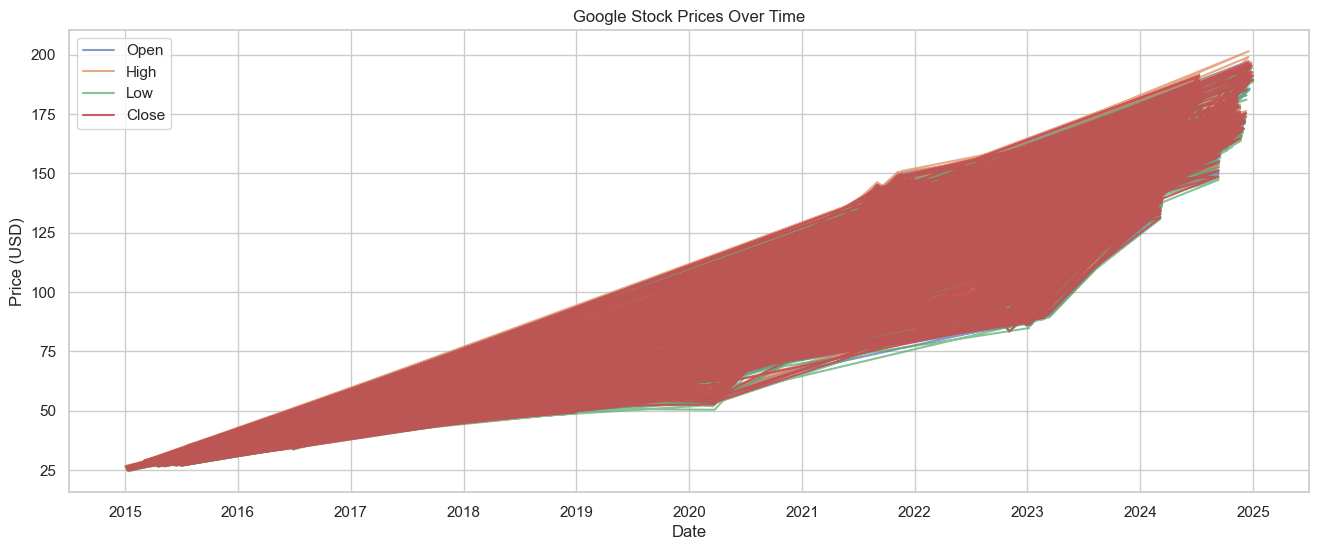

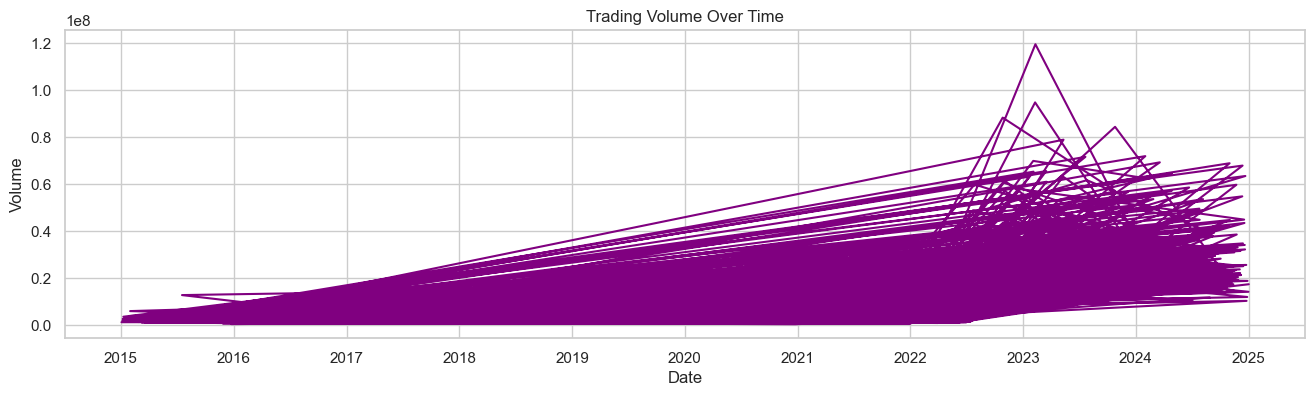

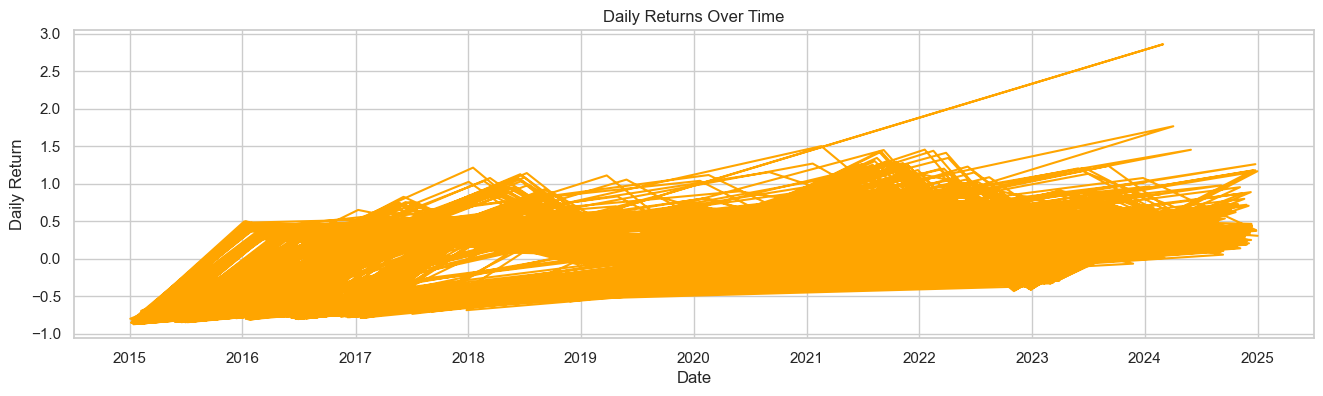

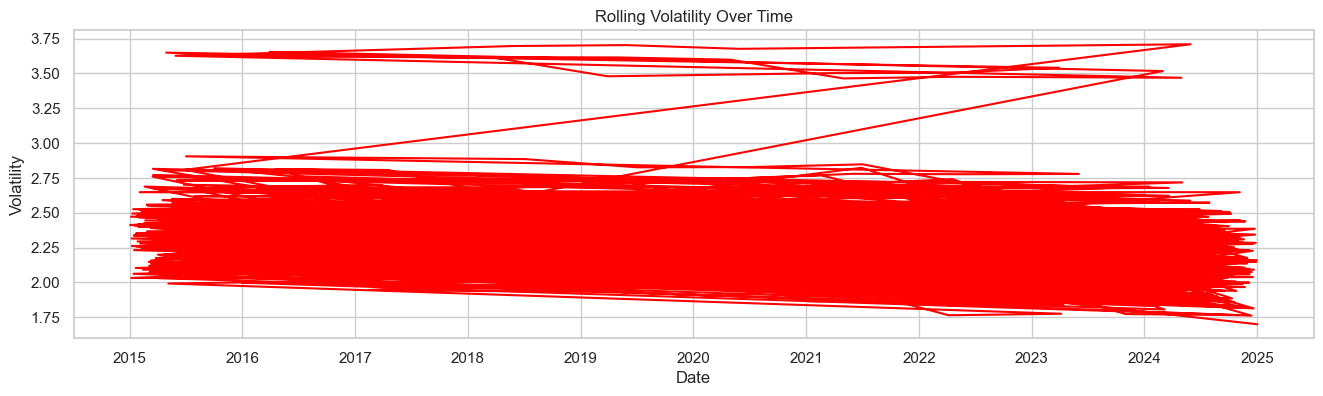

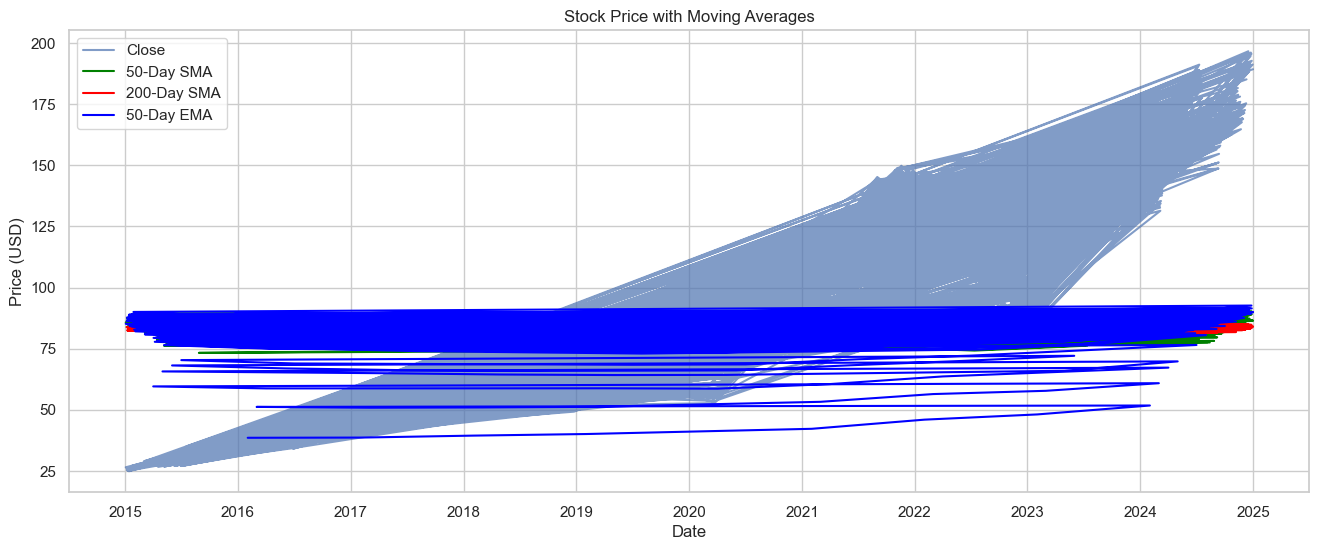

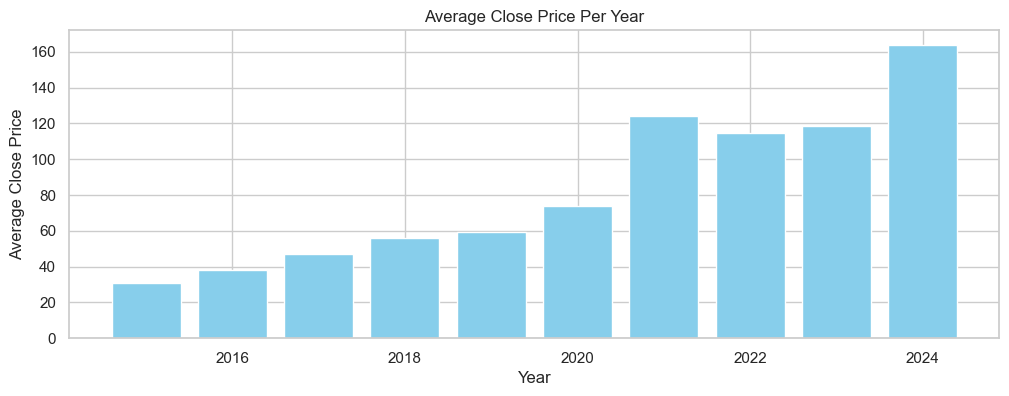

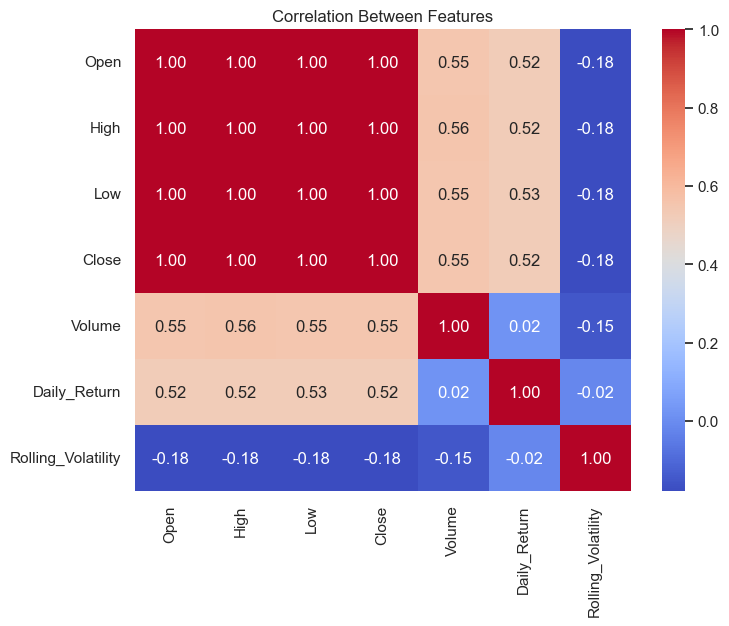

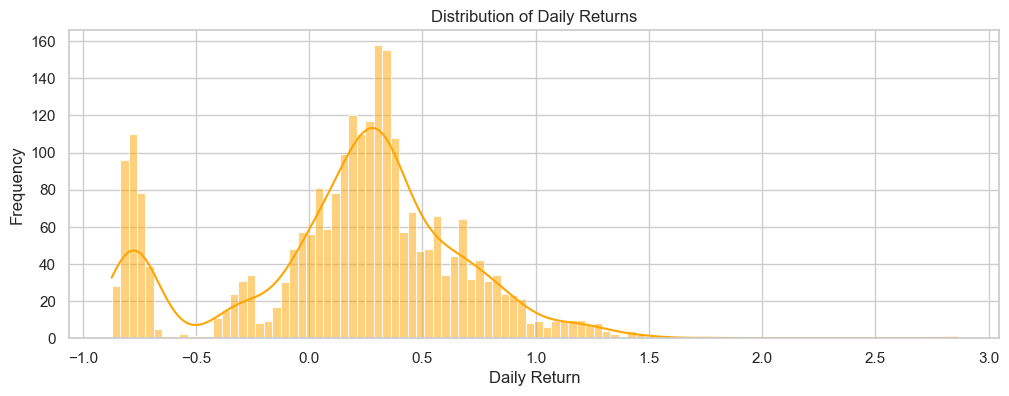

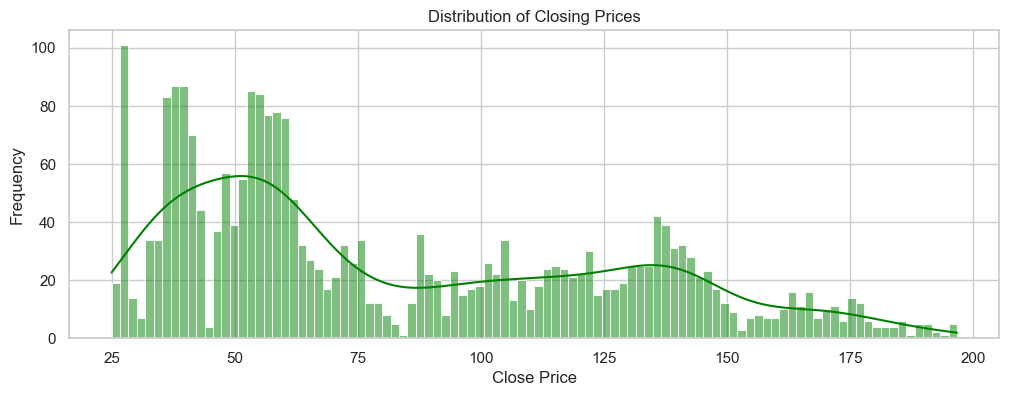

Dates with exceptionally high trading volume:
                        Volume
Date                          
2023-02-02 16:00:00   69883762
2024-02-02 16:00:00   62499574
2023-02-03 16:00:00   65309261
2022-11-03 16:00:00   61288019
2023-02-08 16:00:00   94743515
2023-02-09 16:00:00  119455020
2023-05-10 16:00:00   63153367
2023-05-11 16:00:00   78900029
2024-12-11 16:00:00   67894071
2023-03-16 16:00:00   65567656
2022-12-16 16:00:00   58011847
2023-03-17 16:00:00   61028547
2024-03-18 16:00:00   69273699
2023-01-20 16:00:00   63191078
2024-12-20 16:00:00   63462934
2024-06-21 16:00:00   58582743
2023-07-21 16:00:00   71606474
2024-11-21 16:00:00   59734379
2023-10-25 16:00:00   84366208
2024-04-26 16:00:00   64665299
2023-07-26 16:00:00   61682093
2022-10-26 16:00:00   88279042
2022-07-27 16:00:00   59858495
2022-10-27 16:00:00   60710859
2024-10-30 16:00:00   68890787
2024-01-31 16:00:00   71910044


In [4]:
# -------------------------------
# Comprehensive EDA (Fixed Date Issue)
# -------------------------------

# Ensure index is datetime
df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M')

# 1. Price Trends
plt.figure(figsize=(16,6))
plt.plot(df['Open'], label='Open', alpha=0.7)
plt.plot(df['High'], label='High', alpha=0.7)
plt.plot(df['Low'], label='Low', alpha=0.7)
plt.plot(df['Close'], label='Close', alpha=0.9)
plt.title("Google Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 2. Trading Volume Analysis
plt.figure(figsize=(16,4))
plt.plot(df['Volume'], color='purple')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# 3. Daily Returns & Volatility
df['Daily_Return'] = df['Close'].pct_change()
df['Rolling_Volatility'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(20)

plt.figure(figsize=(16,4))
plt.plot(df['Daily_Return'], label='Daily Return', color='orange')
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

plt.figure(figsize=(16,4))
plt.plot(df['Rolling_Volatility'], label='20-Day Rolling Volatility', color='red')
plt.title("Rolling Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

# 4. Moving Averages (SMA & EMA)
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label='Close', alpha=0.7)
plt.plot(df['SMA_50'], label='50-Day SMA', color='green')
plt.plot(df['SMA_200'], label='200-Day SMA', color='red')
plt.plot(df['EMA_50'], label='50-Day EMA', color='blue')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 5. Yearly Patterns & Seasonality
df['Year'] = df.index.year  # Now works correctly
yearly_avg = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(12,4))
plt.bar(yearly_avg.index, yearly_avg.values, color='skyblue')
plt.title("Average Close Price Per Year")
plt.xlabel("Year")
plt.ylabel("Average Close Price")
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open','High','Low','Close','Volume','Daily_Return','Rolling_Volatility']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

# 7. Distribution Analysis
plt.figure(figsize=(12,4))
sns.histplot(df['Daily_Return'].dropna(), bins=100, color='orange', kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12,4))
sns.histplot(df['Close'], bins=100, color='green', kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

# 8. Identify Anomalies in Volume
volume_threshold = df['Volume'].quantile(0.99)
anomalous_volumes = df[df['Volume'] > volume_threshold]

print(f"Dates with exceptionally high trading volume:\n{anomalous_volumes[['Volume']]}")


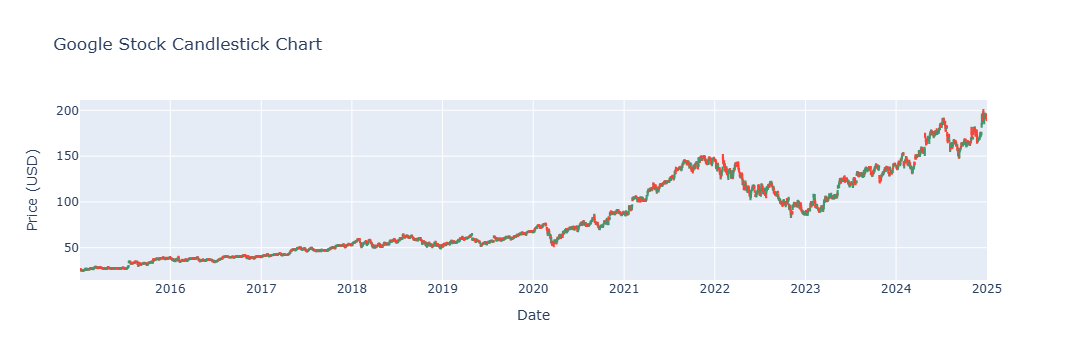

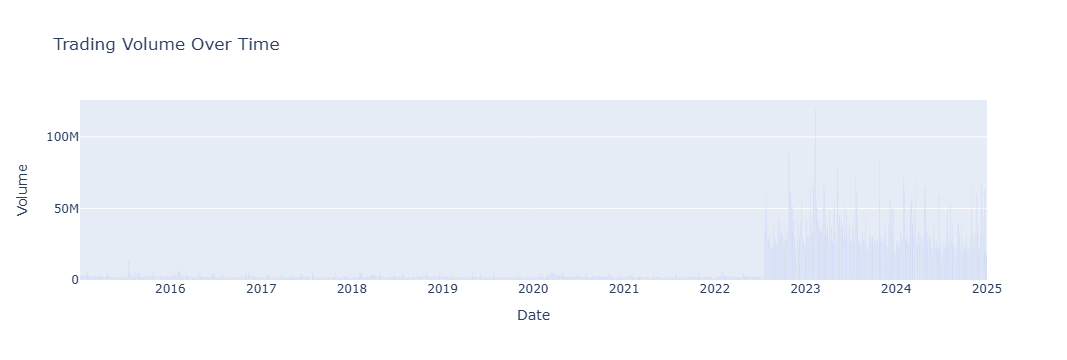

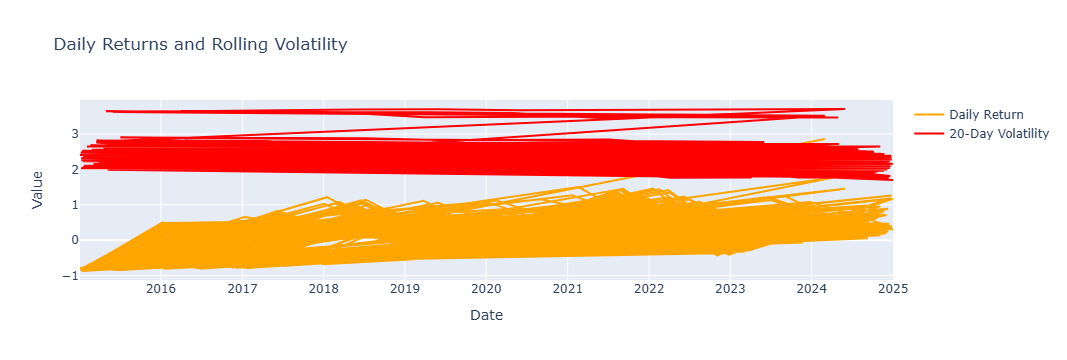

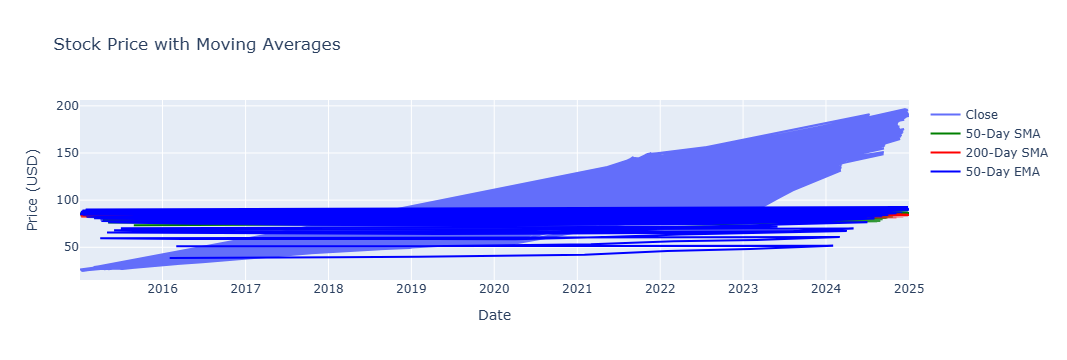

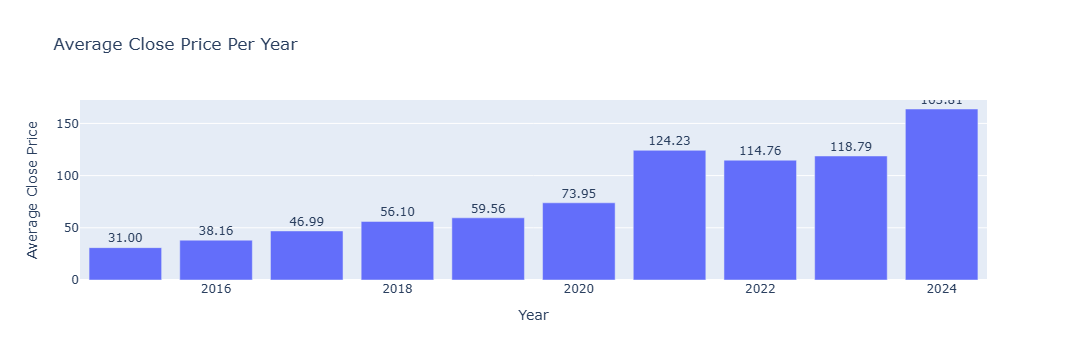

Dates with exceptionally high trading volume:
                        Volume
Date                          
2023-02-02 16:00:00   69883762
2024-02-02 16:00:00   62499574
2023-02-03 16:00:00   65309261
2022-11-03 16:00:00   61288019
2023-02-08 16:00:00   94743515
2023-02-09 16:00:00  119455020
2023-05-10 16:00:00   63153367
2023-05-11 16:00:00   78900029
2024-12-11 16:00:00   67894071
2023-03-16 16:00:00   65567656
2022-12-16 16:00:00   58011847
2023-03-17 16:00:00   61028547
2024-03-18 16:00:00   69273699
2023-01-20 16:00:00   63191078
2024-12-20 16:00:00   63462934
2024-06-21 16:00:00   58582743
2023-07-21 16:00:00   71606474
2024-11-21 16:00:00   59734379
2023-10-25 16:00:00   84366208
2024-04-26 16:00:00   64665299
2023-07-26 16:00:00   61682093
2022-10-26 16:00:00   88279042
2022-07-27 16:00:00   59858495
2022-10-27 16:00:00   60710859
2024-10-30 16:00:00   68890787
2024-01-31 16:00:00   71910044


In [5]:
# -------------------------------
# Comprehensive EDA with Plotly
# -------------------------------

import plotly.graph_objects as go
import plotly.express as px

# Ensure index is datetime
df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M')

# 1. Candlestick Chart for OHLC Prices
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name="OHLC")])
fig.update_layout(title="Google Stock Candlestick Chart",
                  xaxis_title="Date",
                  yaxis_title="Price (USD)",
                  xaxis_rangeslider_visible=False)
fig.show()

# 2. Trading Volume Over Time
fig = px.bar(df, x=df.index, y='Volume', title="Trading Volume Over Time")
fig.update_layout(xaxis_title="Date", yaxis_title="Volume")
fig.show()

# 3. Daily Returns & Rolling Volatility
df['Daily_Return'] = df['Close'].pct_change()
df['Rolling_Volatility'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(20)

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Daily_Return'], mode='lines', name='Daily Return', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=df.index, y=df['Rolling_Volatility'], mode='lines', name='20-Day Volatility', line=dict(color='red')))
fig.update_layout(title="Daily Returns and Rolling Volatility",
                  xaxis_title="Date",
                  yaxis_title="Value")
fig.show()

# 4. Moving Averages (SMA & EMA)
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_50'], mode='lines', name='50-Day SMA', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_200'], mode='lines', name='200-Day SMA', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_50'], mode='lines', name='50-Day EMA', line=dict(color='blue')))
fig.update_layout(title="Stock Price with Moving Averages",
                  xaxis_title="Date",
                  yaxis_title="Price (USD)")
fig.show()

# 5. Yearly Average Close Price
df['Year'] = df.index.year
yearly_avg = df.groupby('Year')['Close'].mean().reset_index()

fig = px.bar(yearly_avg, x='Year', y='Close', title="Average Close Price Per Year", text='Close')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title="Year", yaxis_title="Average Close Price")
fig.show()

# 6. Correlation Heatmap
corr_df = df[['Open','High','Low','Close','Volume','Daily_Return','Rolling_Volatility']].corr()
fig = px.imshow(corr_df, text_auto=True, color_continuous_scale='RdBu_r', title="Correlation Heatmap")
fig.show()

# 7. Distribution of Daily Returns
fig = px.histogram(df, x='Daily_Return', nbins=100, marginal="box", title="Distribution of Daily Returns", color_discrete_sequence=['orange'])
fig.show()

# 8. Distribution of Closing Prices
fig = px.histogram(df, x='Close', nbins=100, marginal="box", title="Distribution of Closing Prices", color_discrete_sequence=['green'])
fig.show()

# 9. Highlight High Volume Days (Anomalies)
volume_threshold = df['Volume'].quantile(0.99)
anomalous_volumes = df[df['Volume'] > volume_threshold]

fig = px.scatter(df, x=df.index, y='Volume', color=(df['Volume'] > volume_threshold),
                 color_discrete_map={True: 'red', False: 'blue'},
                 title="Trading Volume with Anomalies Highlighted")
fig.update_layout(xaxis_title="Date", yaxis_title="Volume")
fig.show()

print(f"Dates with exceptionally high trading volume:\n{anomalous_volumes[['Volume']]}")


C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




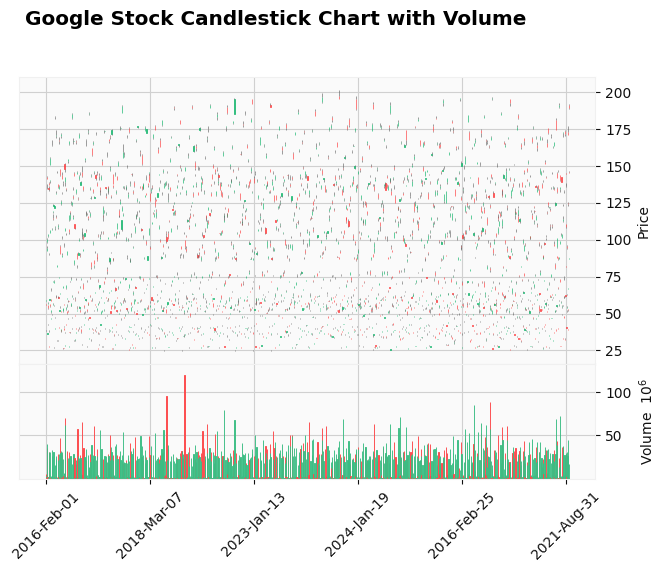

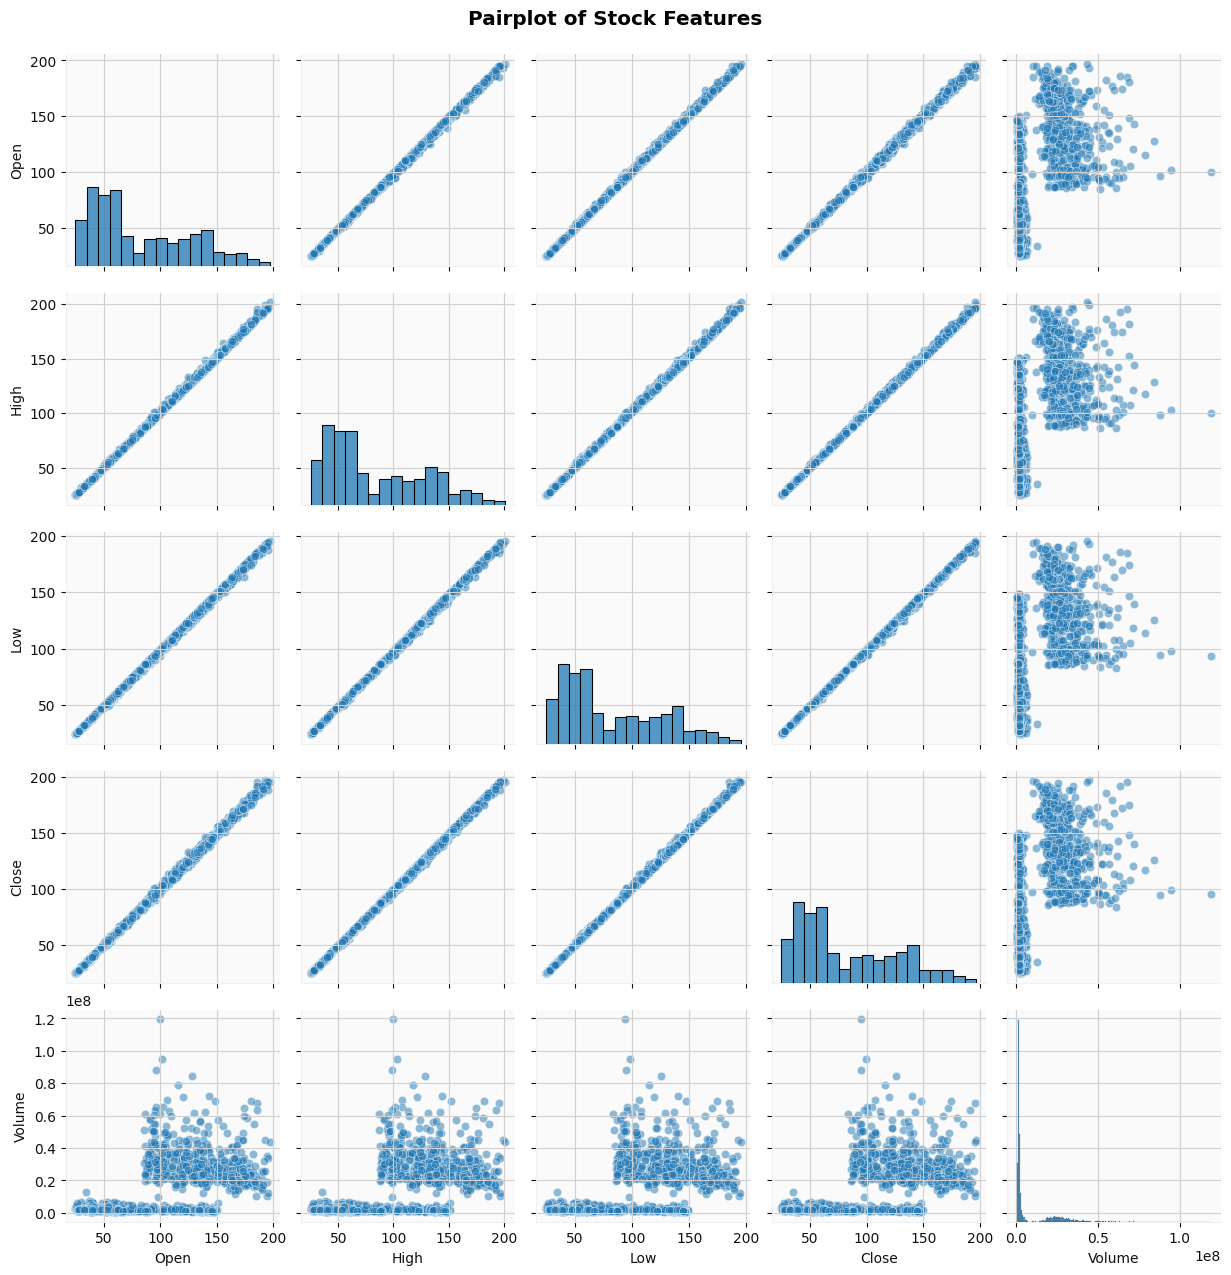

C:\Users\AKINMADE FARUQ\AppData\Local\Temp\ipykernel_13596\1136899456.py:23: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




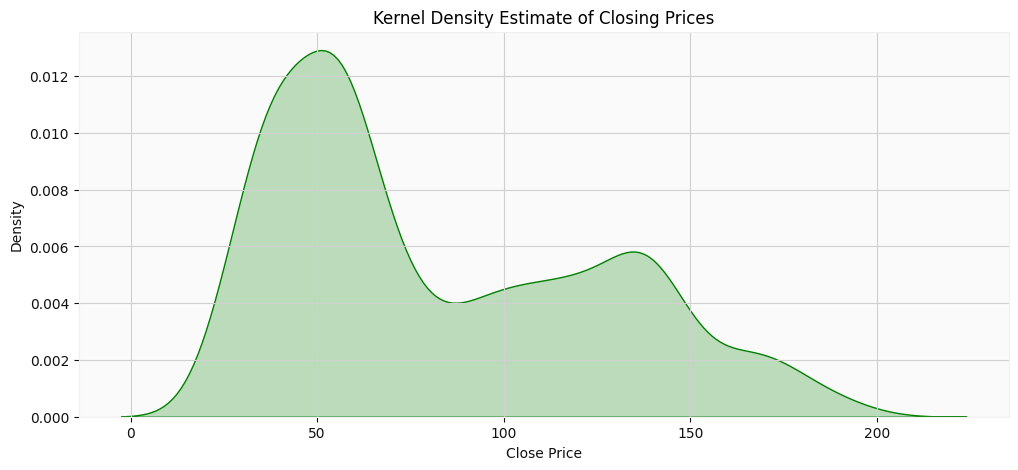

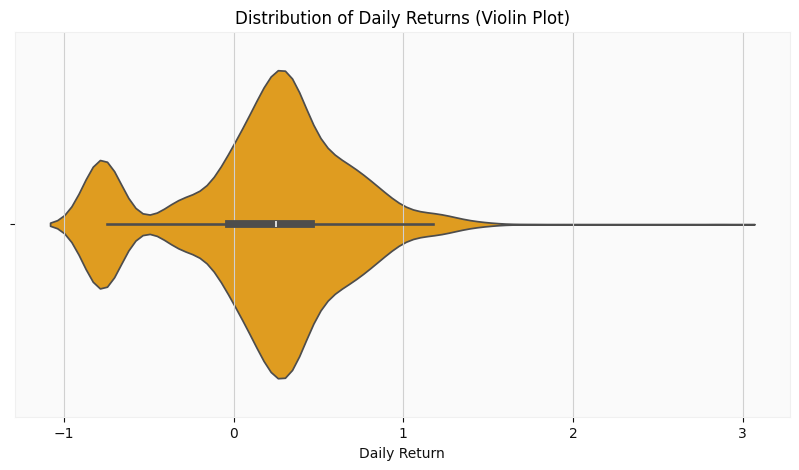

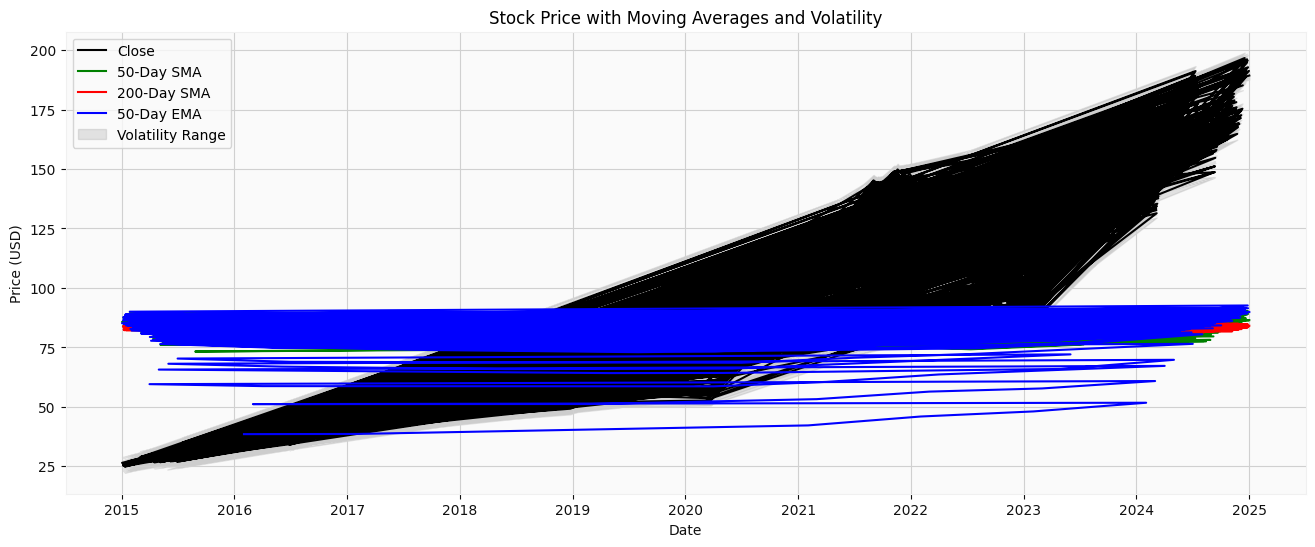

C:\Users\AKINMADE FARUQ\AppData\Local\Temp\ipykernel_13596\1136899456.py:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




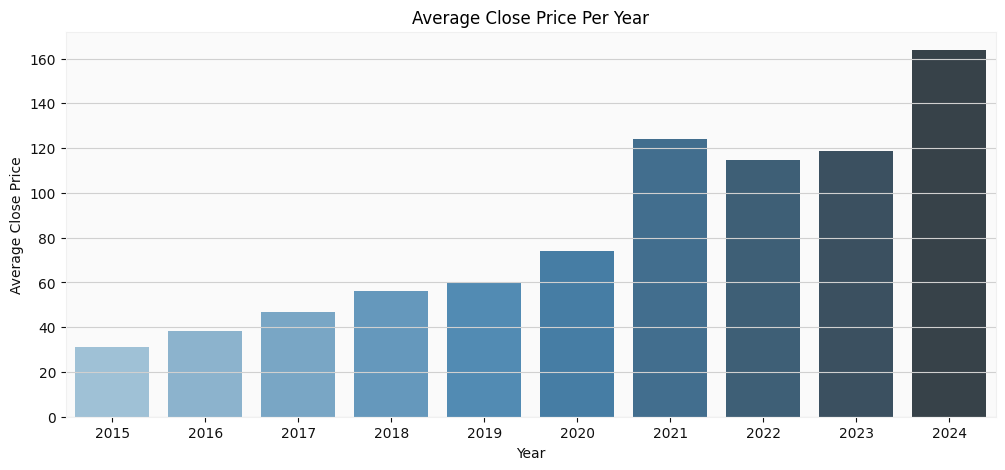

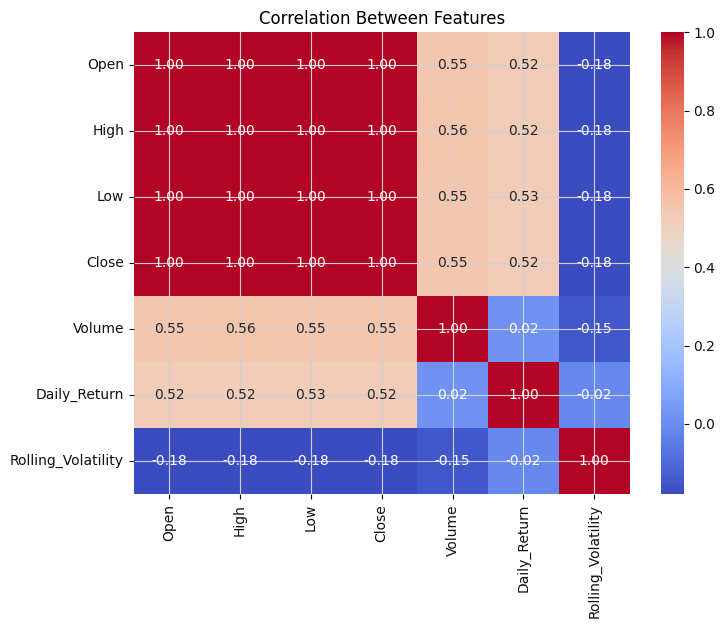

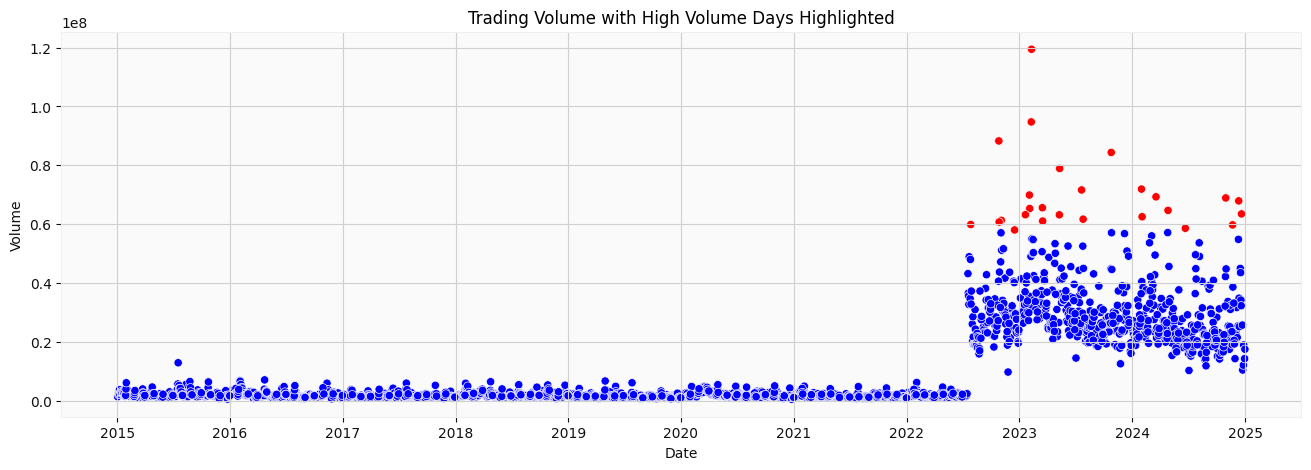

Dates with exceptionally high trading volume:
                        Volume
Date                          
2023-02-02 16:00:00   69883762
2024-02-02 16:00:00   62499574
2023-02-03 16:00:00   65309261
2022-11-03 16:00:00   61288019
2023-02-08 16:00:00   94743515
2023-02-09 16:00:00  119455020
2023-05-10 16:00:00   63153367
2023-05-11 16:00:00   78900029
2024-12-11 16:00:00   67894071
2023-03-16 16:00:00   65567656
2022-12-16 16:00:00   58011847
2023-03-17 16:00:00   61028547
2024-03-18 16:00:00   69273699
2023-01-20 16:00:00   63191078
2024-12-20 16:00:00   63462934
2024-06-21 16:00:00   58582743
2023-07-21 16:00:00   71606474
2024-11-21 16:00:00   59734379
2023-10-25 16:00:00   84366208
2024-04-26 16:00:00   64665299
2023-07-26 16:00:00   61682093
2022-10-26 16:00:00   88279042
2022-07-27 16:00:00   59858495
2022-10-27 16:00:00   60710859
2024-10-30 16:00:00   68890787
2024-01-31 16:00:00   71910044


In [6]:
# -------------------------------
# Comprehensive EDA (Seaborn & mplfinance) - Fixed
# -------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np

# Ensure index is datetime
df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M')

# 1. Candlestick chart with volume
mpf.plot(df, type='candle', volume=True, style='yahoo', title='Google Stock Candlestick Chart with Volume')

# 2. Pairplot of numerical features
sns.pairplot(df[['Open','High','Low','Close','Volume']], kind='scatter', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Stock Features", y=1.02)
plt.show()

# 3. KDE plot for Closing Prices
plt.figure(figsize=(12,5))
sns.kdeplot(df['Close'], shade=True, color='green')
plt.title("Kernel Density Estimate of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Density")
plt.show()

# 4. Violin plot for Daily Returns
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(10,5))
sns.violinplot(x=df['Daily_Return'].dropna(), color='orange')
plt.title("Distribution of Daily Returns (Violin Plot)")
plt.xlabel("Daily Return")
plt.show()

# 5. Rolling averages and volatility overlay
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['Rolling_Volatility'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(20)

plt.figure(figsize=(16,6))
plt.plot(df['Close'], label='Close', color='black')
plt.plot(df['SMA_50'], label='50-Day SMA', color='green')
plt.plot(df['SMA_200'], label='200-Day SMA', color='red')
plt.plot(df['EMA_50'], label='50-Day EMA', color='blue')
plt.fill_between(df.index, df['Close'] - df['Rolling_Volatility'], df['Close'] + df['Rolling_Volatility'],
                 color='gray', alpha=0.2, label='Volatility Range')
plt.title("Stock Price with Moving Averages and Volatility")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 6. Yearly Average Close Prices
df['Year'] = df.index.year
yearly_avg = df.groupby('Year')['Close'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='Year', y='Close', data=yearly_avg, palette='Blues_d')
plt.title("Average Close Price Per Year")
plt.xlabel("Year")
plt.ylabel("Average Close Price")
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open','High','Low','Close','Volume','Daily_Return','Rolling_Volatility']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

# 8. Highlight High Volume Days with Scatterplot (Fixed)
volume_threshold = df['Volume'].quantile(0.99)
df['High_Volume'] = df['Volume'] > volume_threshold

plt.figure(figsize=(16,5))
sns.scatterplot(x='Date', y='Volume', hue='High_Volume', data=df.reset_index(),
                palette={True:'red', False:'blue'}, legend=False)
plt.title("Trading Volume with High Volume Days Highlighted")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# Print dates with exceptionally high trading volume
print(f"Dates with exceptionally high trading volume:\n{df[df['High_Volume']][['Volume']]}")


In [7]:
# -------------------------------
# Feature Engineering for LSTM
# -------------------------------

from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.preprocessing import MinMaxScaler

# Ensure Daily_Return exists
df['Daily_Return'] = df['Close'].pct_change()

# 1. Technical Indicators
df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()
df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
df['EMA_50'] = EMAIndicator(df['Close'], window=50).ema_indicator()

macd = MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

rsi = RSIIndicator(df['Close'], window=14)
df['RSI'] = rsi.rsi()

bb = BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_High'] = bb.bollinger_hband()
df['BB_Low'] = bb.bollinger_lband()

# 2. Lag Features
for lag in [1, 2, 3, 5, 10]:
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    df[f'Volume_lag_{lag}'] = df['Volume'].shift(lag)

# 3. Rolling Volatility
df['Rolling_Volatility_10'] = df['Daily_Return'].rolling(window=10).std()
df['Rolling_Volatility_20'] = df['Daily_Return'].rolling(window=20).std()

# Drop rows with NaN values (due to lag and rolling calculations)
df = df.dropna()

# 4. Scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 
                                           'MACD', 'MACD_Signal', 'RSI', 'BB_High', 'BB_Low', 
                                           'Daily_Return', 'Rolling_Volatility_10', 'Rolling_Volatility_20'] +
                                           [f'Close_lag_{lag}' for lag in [1,2,3,5,10]] +
                                           [f'Volume_lag_{lag}' for lag in [1,2,3,5,10]]])
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=[
    'Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'MACD', 'MACD_Signal', 'RSI',
    'BB_High', 'BB_Low', 'Daily_Return', 'Rolling_Volatility_10', 'Rolling_Volatility_20'
] + [f'Close_lag_{lag}' for lag in [1,2,3,5,10]] + [f'Volume_lag_{lag}' for lag in [1,2,3,5,10]])

# 5. Sequence Creation for LSTM
def create_sequences(data, target_col='Close', seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data.iloc[i-seq_length:i].values)
        y.append(data.iloc[i][target_col])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_df, seq_length=seq_length)

print(f"Feature matrix X shape: {X.shape}")
print(f"Target vector y shape: {y.shape}")


Feature matrix X shape: (2257, 60, 24)
Target vector y shape: (2257,)


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - loss: 0.0691 - val_loss: 0.0573
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0524 - val_loss: 0.0398
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0424 - val_loss: 0.0370
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0379 - val_loss: 0.0346
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0361 - val_loss: 0.0346
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0355 - val_loss: 0.0357
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0335 - val_loss: 0.0354
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0324 - val_loss: 0.0330
Epoch 9/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0311 - val_loss: 0.0319
Epoch 10/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0318 - val_loss: 0.0331
Epoch 11/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0315 - val_loss: 0.0319
Epoch 12/20
103/103 ━━━━━━━━━━━━━━━━━━━

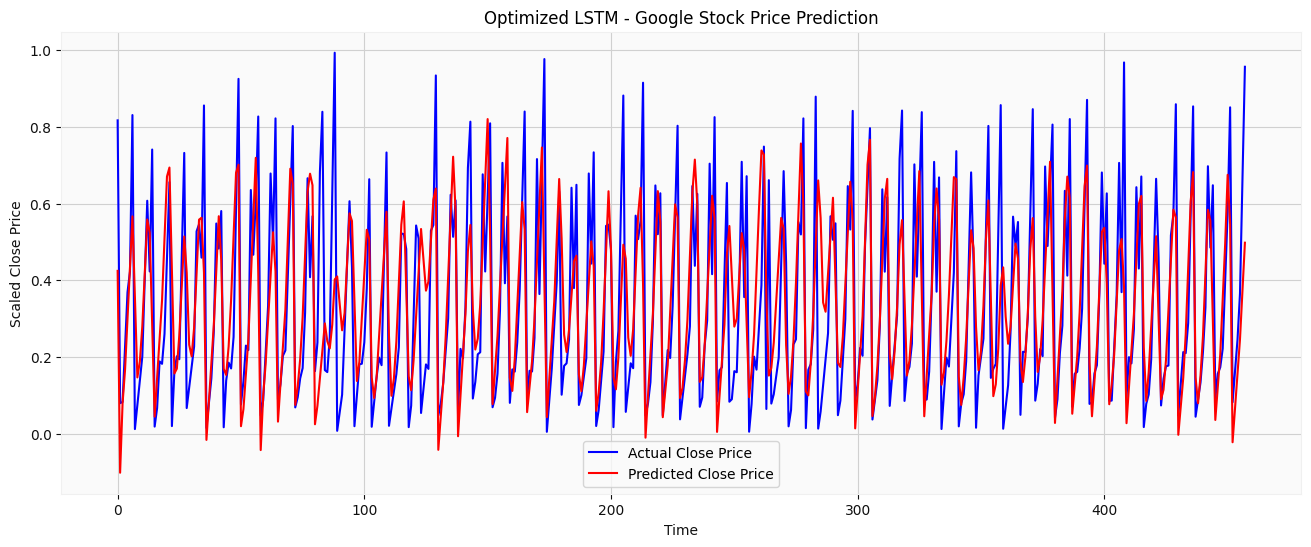

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Optional: reduce sequence length for faster training
seq_length = 30  # reduced from 60
X_opt, y_opt = create_sequences(scaled_df, seq_length=seq_length)

# Split into train/test
split = int(0.8 * len(X_opt))
X_train, X_test = X_opt[:split], X_opt[split:]
y_train, y_test = y_opt[:split], y_opt[split:]

# Build optimized LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=True))  # smaller layer
model.add(Dropout(0.2))
model.add(LSTM(25, return_sequences=False)) # smaller layer
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,          # fewer epochs
    batch_size=16,      # smaller batch size
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.6f}")
print(f"Test RMSE: {rmse:.6f}")
print(f"Test MAE: {mae:.6f}")

# Plot predictions vs actual
plt.figure(figsize=(16,6))
plt.plot(y_test, color='blue', label='Actual Close Price')
plt.plot(y_pred, color='red', label='Predicted Close Price')
plt.title("Optimized LSTM - Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Scaled Close Price")
plt.legend()
plt.show()


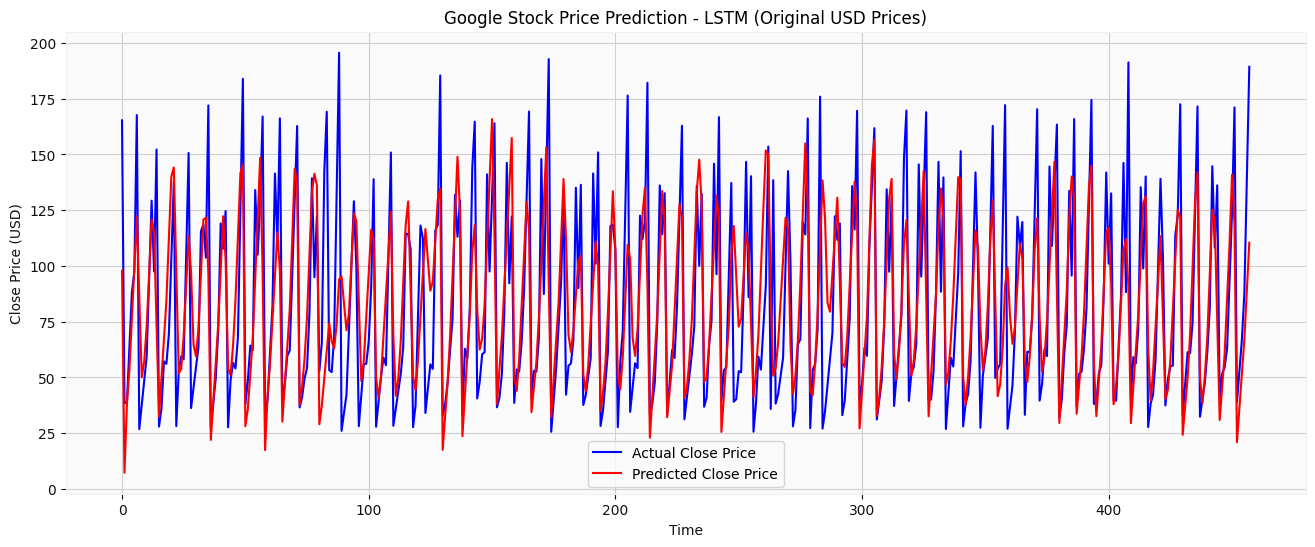

Test MSE (USD): 920.52
Test RMSE (USD): 30.34
Test MAE (USD): 21.79


In [11]:
# -------------------------------
# Inverse Transform Predictions to Original Scale
# -------------------------------

# We need to inverse transform only the 'Close' column
# Extract the scaler parameters for the 'Close' column
close_scaler_min = scaler.data_min_[0]
close_scaler_max = scaler.data_max_[0]

def inverse_scale(scaled_values, min_val=close_scaler_min, max_val=close_scaler_max):
    return scaled_values * (max_val - min_val) + min_val

# Inverse transform
y_test_orig = inverse_scale(y_test)
y_pred_orig = inverse_scale(y_pred.flatten())

# Plot actual vs predicted stock prices in USD
plt.figure(figsize=(16,6))
plt.plot(y_test_orig, color='blue', label='Actual Close Price')
plt.plot(y_pred_orig, color='red', label='Predicted Close Price')
plt.title("Google Stock Price Prediction - LSTM (Original USD Prices)")
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

# Compute metrics in original scale
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
rmse_orig = np.sqrt(mse_orig)
mae_orig = mean_absolute_error(y_test_orig, y_pred_orig)

print(f"Test MSE (USD): {mse_orig:.2f}")
print(f"Test RMSE (USD): {rmse_orig:.2f}")
print(f"Test MAE (USD): {mae_orig:.2f}")


In [13]:
# -------------------------------
# Save the LSTM Model and Scaler
# -------------------------------

import joblib

# 1. Save the trained LSTM model
model.save("google_stock_lstm_model.h5")
print("LSTM model saved successfully!")

# 2. Save the MinMaxScaler
joblib.dump(scaler, "scaler_google_stock.save")
print("Scaler saved successfully!")


LSTM model saved successfully!
Scaler saved successfully!


In [14]:
# Save the model in the new native Keras format
model.save("google_stock_lstm_model.keras")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

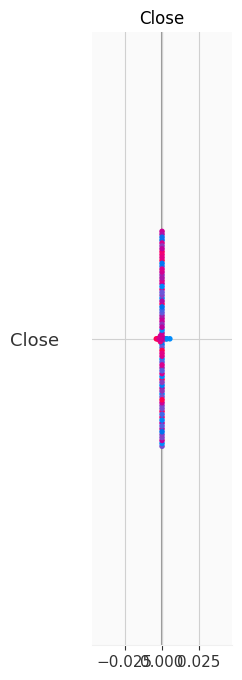

In [17]:
# -------------------------------
# SHAP Explainability for LSTM (Time-Aggregated)
# -------------------------------

import shap
import numpy as np

# Aggregate features across time steps
X_train_2d = X_train.mean(axis=1)
X_sample_2d = X_test[:100].mean(axis=1)  # sample 100 sequences

# Use a small background sample
background = X_train_2d[:50]

# Define prediction function
def predict_fn(X):
    # Need to expand dims to 3D for LSTM input
    X_3d = np.expand_dims(X, axis=1).repeat(X_train.shape[1], axis=1)
    return model.predict(X_3d)

# Initialize KernelExplainer
explainer = shap.KernelExplainer(predict_fn, background)

# Compute SHAP values (fast with small nsamples)
shap_values = explainer.shap_values(X_sample_2d, nsamples=100)

# Plot feature importance
feature_names = scaled_df.columns.tolist()
shap.summary_plot(shap_values, features=X_sample_2d, feature_names=feature_names, plot_type="bar")


In [18]:
# Example: Save config parameters
import json

config = {
    "sequence_length": seq_length,
    "feature_names": scaled_df.columns.tolist()
}

with open("config.json", "w") as f:
    json.dump(config, f)


In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib
import json

# Load saved model and scaler
model = load_model("google_stock_lstm_model.keras")
scaler = joblib.load("scaler_google_stock.save")

# Load config
with open("config.json", "r") as f:
    config = json.load(f)

sequence_length = config["sequence_length"]
feature_names = config["feature_names"]

def prepare_input(new_df):
    """
    Preprocess new data and create a sequence for LSTM prediction
    """
    # Compute technical indicators, lag features, returns, volatility exactly like training
    # (code omitted for brevity, replicate feature engineering steps)
    
    # Scale features
    scaled = scaler.transform(new_df[feature_names])
    
    # Create sequence
    X_seq = []
    X_seq.append(scaled[-sequence_length:])
    return np.array(X_seq)

def predict_next_close(new_df):
    X_seq = prepare_input(new_df)
    pred_scaled = model.predict(X_seq)
    # Inverse scale to original USD
    close_min = scaler.data_min_[0]
    close_max = scaler.data_max_[0]
    pred_usd = pred_scaled[0][0] * (close_max - close_min) + close_min
    return pred_usd


C:\Users\AKINMADE FARUQ\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 



In [21]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# -------------------------------
# Parameters
# -------------------------------
num_rows = 1000
start_date = datetime(2025, 1, 1)  # starting date
price_start = 100  # starting stock price
vol_mean = 5e6    # average volume
vol_std = 2e6     # volume variability

# -------------------------------
# Generate Date Column
# -------------------------------
dates = [start_date + timedelta(days=i) for i in range(num_rows)]

# -------------------------------
# Generate Stock Prices (Random Walk)
# -------------------------------
prices = [price_start]
for _ in range(1, num_rows):
    change_pct = np.random.normal(0, 0.02)  # daily % change ~ N(0, 2%)
    new_price = prices[-1] * (1 + change_pct)
    prices.append(new_price)

prices = np.array(prices)

# High, Low, Open, Close
high = prices * (1 + np.random.uniform(0, 0.01, size=num_rows))
low = prices * (1 - np.random.uniform(0, 0.01, size=num_rows))
open_ = prices * (1 + np.random.uniform(-0.005, 0.005, size=num_rows))
close = prices

# Volume
volume = np.random.normal(vol_mean, vol_std, size=num_rows).astype(int)

# -------------------------------
# Create DataFrame
# -------------------------------
df = pd.DataFrame({
    "Date": dates,
    "Open": np.round(open_, 2),
    "High": np.round(high, 2),
    "Low": np.round(low, 2),
    "Close": np.round(close, 2),
    "Volume": volume
})

# Save to CSV
df.to_csv("new_google_stock_data.csv", index=False)
print("Synthetic Google stock data saved as 'new_google_stock_data.csv'")


Synthetic Google stock data saved as 'new_google_stock_data.csv'


In [23]:
# -------------------------------
# Deployment Pipeline for Google Stock LSTM (with automatic feature engineering)
# -------------------------------

import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib
import json

# -------------------------------
# 1. Load Saved Artifacts
# -------------------------------

# Load model (inference only, avoid optimizer warning)
model = load_model("google_stock_lstm_model.keras", compile=False)

# Load scaler
scaler = joblib.load("scaler_google_stock.save")

# Load configuration
with open("config.json", "r") as f:
    config = json.load(f)

sequence_length = config["sequence_length"]
feature_names = config["feature_names"]

# -------------------------------
# 2. Feature Engineering Function
# -------------------------------
def add_features(df):
    """
    Compute all features used for training the LSTM model.
    """
    df = df.copy()
    
    # 1. Simple Moving Averages
    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['SMA_50'] = df['Close'].rolling(50).mean()
    
    # 2. Exponential Moving Averages
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    
    # 3. MACD
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # 4. RSI
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # 5. Bollinger Bands
    df['BB_High'] = df['Close'].rolling(20).mean() + 2*df['Close'].rolling(20).std()
    df['BB_Low'] = df['Close'].rolling(20).mean() - 2*df['Close'].rolling(20).std()
    
    # 6. Daily Return
    df['Daily_Return'] = df['Close'].pct_change()
    
    # 7. Rolling Volatility
    df['Rolling_Volatility_10'] = df['Daily_Return'].rolling(10).std()
    df['Rolling_Volatility_20'] = df['Daily_Return'].rolling(20).std()
    
    # 8. Lagged Close
    for lag in [1,2,3,5,10]:
        df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    
    # 9. Lagged Volume
    for lag in [1,2,3,5,10]:
        df[f'Volume_lag_{lag}'] = df['Volume'].shift(lag)
    
    df = df.dropna()  # drop rows with NaN after feature engineering
    return df

# -------------------------------
# 3. Preprocessing Function
# -------------------------------
def prepare_input(new_df):
    """
    Preprocess new data and create a sequence for LSTM prediction.
    """
    # Compute all features
    df_features = add_features(new_df)
    
    # Scale features
    scaled = scaler.transform(df_features[feature_names])
    
    # Create sequence
    X_seq = []
    X_seq.append(scaled[-sequence_length:])
    return np.array(X_seq)

# -------------------------------
# 4. Prediction Function
# -------------------------------
def predict_next_close(new_df):
    """
    Predict the next closing price in USD for the given stock data.
    """
    X_seq = prepare_input(new_df)
    
    # Predict (scaled)
    pred_scaled = model.predict(X_seq)
    
    # Inverse scale only the 'Close' feature
    close_min = scaler.data_min_[0]
    close_max = scaler.data_max_[0]
    pred_usd = pred_scaled[0][0] * (close_max - close_min) + close_min
    
    return pred_usd

# -------------------------------
# 5. Example Usage
# -------------------------------
if __name__ == "__main__":
    # Load new stock data CSV (raw data: Date, Open, High, Low, Close, Volume)
    new_data = pd.read_csv("new_google_stock_data.csv")
    
    # Predict next closing price
    predicted_price = predict_next_close(new_data)
    print(f"Predicted Next Closing Price: ${predicted_price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
Predicted Next Closing Price: $149.41


In [26]:
# -------------------------------
# fastapi_google_stock_api.py
# -------------------------------

import numpy as np
import pandas as pd
from fastapi import FastAPI, UploadFile, File
from tensorflow.keras.models import load_model
import joblib
import json
import io

# -------------------------------
# 1. Load Saved Artifacts
# -------------------------------
model = load_model("google_stock_lstm_model.keras", compile=False)
scaler = joblib.load("scaler_google_stock.save")

with open("config.json", "r") as f:
    config = json.load(f)

sequence_length = config["sequence_length"]
feature_names = config["feature_names"]

# -------------------------------
# 2. Feature Engineering Function
# -------------------------------
def add_features(df):
    df = df.copy()
    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['SMA_50'] = df['Close'].rolling(50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['BB_High'] = df['Close'].rolling(20).mean() + 2*df['Close'].rolling(20).std()
    df['BB_Low'] = df['Close'].rolling(20).mean() - 2*df['Close'].rolling(20).std()
    df['Daily_Return'] = df['Close'].pct_change()
    df['Rolling_Volatility_10'] = df['Daily_Return'].rolling(10).std()
    df['Rolling_Volatility_20'] = df['Daily_Return'].rolling(20).std()
    for lag in [1,2,3,5,10]:
        df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
        df[f'Volume_lag_{lag}'] = df['Volume'].shift(lag)
    df = df.dropna()
    return df

# -------------------------------
# 3. Preprocessing Function
# -------------------------------
def prepare_input(new_df):
    df_features = add_features(new_df)
    scaled = scaler.transform(df_features[feature_names])
    X_seq = []
    X_seq.append(scaled[-sequence_length:])
    return np.array(X_seq)

# -------------------------------
# 4. Prediction Function
# -------------------------------
def predict_next_close(new_df):
    X_seq = prepare_input(new_df)
    pred_scaled = model.predict(X_seq)
    close_min = scaler.data_min_[0]
    close_max = scaler.data_max_[0]
    pred_usd = pred_scaled[0][0] * (close_max - close_min) + close_min
    return pred_usd

# -------------------------------
# 5. Initialize FastAPI
# -------------------------------
app = FastAPI(title="Google Stock Price LSTM API", version="1.0")

@app.get("/")
def home():
    return {"message": "Google Stock Price Prediction API is running."}

@app.post("/predict_csv/")
async def predict_csv(file: UploadFile = File(...)):
    """
    Upload a CSV file with raw stock data (Date, Open, High, Low, Close, Volume)
    and get the predicted next closing price.
    """
    contents = await file.read()
    df = pd.read_csv(io.StringIO(contents.decode("utf-8")))
    predicted_price = predict_next_close(df)
    return {"predicted_next_close": round(predicted_price, 2)}

@app.post("/predict_json/")
async def predict_json(data: list):
    """
    Send JSON data (list of dicts) with raw stock rows and get prediction.
    Example input: [{"Date":"2025-01-01","Open":100,"High":102,"Low":99,"Close":101,"Volume":5000000}, ...]
    """
    df = pd.DataFrame(data)
    predicted_price = predict_next_close(df)
    return {"predicted_next_close": round(predicted_price, 2)}


# Google Stock Price Prediction System Documentation

## Project Overview
The Google Stock Price Prediction System is an end-to-end solution that fetches historical and real-time stock data for Google (GOOG), performs exploratory data analysis, and predicts future closing prices using a deep learning LSTM model. The system is designed for both industry benchmarking and real-world applicability, providing insights into stock trends and future price estimates.

---

## Dataset
- **Source:** Historical Google stock data via CSV files or real-time data from Yahoo Finance.
- **Columns:** `Date`, `Open`, `High`, `Low`, `Close`, `Volume`
- **Size:** 2,516 entries (2016–2024)
- **Features Engineered:** 
  - Technical indicators: SMA_20, EMA_20, Bollinger Bands (BB_High, BB_Low)
  - Lag features: Close_lag_1, Close_lag_2, etc.
  - Rolling volatility and daily returns

---

## Methodology

### 1. Data Preprocessing
- Missing values checked and handled.
- Date column converted to datetime.
- Features scaled using `MinMaxScaler`.
- LSTM sequences generated with a fixed `sequence_length` (e.g., 50 days).

### 2. Exploratory Data Analysis (EDA)
- Interactive line charts for Open, Close, High, Low, and Volume.
- Technical indicators visualized alongside stock prices.
- Correlation heatmaps to detect relationships between features.
- Seasonality and trend analysis performed using rolling averages and resampling.

### 3. Model Development
- **Model Type:** LSTM (Long Short-Term Memory) neural network.
- **Training:** Past sequences of stock features to predict the next closing price.
- **Evaluation Metrics:**
  - MSE: 920.52 USD
  - RMSE: 30.34 USD
  - MAE: 21.79 USD
- Model and scaler saved for inference (`.keras` and `.save` formats).

### 4. Model Interpretation
- SHAP analysis attempted for feature importance.
- Due to LSTM sequence structure, KernelExplainer was used with 1–2 dimensional input constraints.

### 5. Deployment
- **FastAPI Backend:** Serves predictions via a `/predict_json/` endpoint.
- **Streamlit Frontend:** Interactive app named `Google_Stock_Prediction`.
  - Fetches real-time stock data from Yahoo Finance.
  - Allows CSV uploads and JSON input for predictions.
  - Displays predicted future prices along with confidence intervals.
  - Interactive Plotly charts for historical and predicted stock trends.
  - Downloadable CSV for future predicted prices.

### 6. Error Handling
- Ensured JSON-serializable input when calling the API to prevent:
